In [ ]:
# Sofie Ghysels / Homework 7

In [ ]:
# Homework: Neural Network - Company Bankruptcy Prediction

In [50]:
# Set environment params
Sys.setenv(LANG='en')  # English

# Import libraries
library(mlr)           # ML toolkit
library(caret)         # ML toolkit
library(nnet)          # class.ind() function
library(neuralnet)     # Deep Neural Networks
library(randomForest)  # Random Forest
library(e1071)         # SVM
library(ggplot2)       # Visualization
library(glmnet)

# Import data
library(ISLR)      # Data from the course book
library(MASS)      # Boston housing dataset
library(datasets)  # US crime dataset

# Resize plot
library(repr)  # String and binary representations

Loading required package: Matrix

Loaded glmnet 4.1-3



In [11]:
# importing the dataset
data <- read.csv("C:/Users/sghysels/OneDrive - IESEG/Documents/2021-2022/SEMESTER 2/4. Statistical and Machine Learning approches for marketing/7/data.csv")

In [15]:
str(data)

'data.frame':	6819 obs. of  96 variables:
 $ Bankrupt.                                              : int  1 1 1 1 1 1 0 0 0 0 ...
 $ ROA.C..before.interest.and.depreciation.before.interest: num  0.371 0.464 0.426 0.4 0.465 ...
 $ ROA.A..before.interest.and...after.tax                 : num  0.424 0.538 0.499 0.451 0.538 ...
 $ ROA.B..before.interest.and.depreciation.after.tax      : num  0.406 0.517 0.472 0.458 0.522 ...
 $ Operating.Gross.Margin                                 : num  0.601 0.61 0.601 0.584 0.599 ...
 $ Realized.Sales.Gross.Margin                            : num  0.601 0.61 0.601 0.584 0.599 ...
 $ Operating.Profit.Rate                                  : num  0.999 0.999 0.999 0.999 0.999 ...
 $ Pre.tax.net.Interest.Rate                              : num  0.797 0.797 0.796 0.797 0.797 ...
 $ After.tax.net.Interest.Rate                            : num  0.809 0.809 0.808 0.809 0.809 ...
 $ Non.industry.income.and.expenditure.revenue            : num  0.303 0.304 0.30

In [9]:
install.packages("neuralnet")
library('neuralnet')

package 'neuralnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\sghysels\AppData\Local\Temp\RtmpWEPq1w\downloaded_packages


In [ ]:
# Q1: Randomly divide data into train/test as 80/20 (set.seed=1)

In [19]:
#splitting data into training and testing set
set.seed(1)
train_index <- sample(1:nrow(data), nrow(data) * 0.2)
train <- data[train_index, ]
test <- data[-train_index, ]

In [ ]:
# Q2: Build a NN model with 1 hidden layer of 30 neurons, sigmoid activation function.

In [ ]:
n <- neuralnet(data ~ .,
               data = train,
               hidden = c(30),
               linear.output = F,
               lifesign = 'full',
               rep=1)

In [ ]:
# visually plot the model 
plot(n,col.hidden = 'darkgreen',     
col.hidden.synapse = 'darkgreen',
     show.weights = F,
     information = F,
     fill = 'lightblue')

In [ ]:
# Q3: Build a deep NN model with multiple hidden layers (of your choice) and sigmoid activation function.

In [ ]:
n2 <- neuralnet(data ~ .,
               data = train,
               hidden = c(12,7),
               linear.output = F,
               lifesign = 'full',
               rep=1)

In [ ]:
# visually plot the model 
plot(n2,col.hidden = 'darkgreen',     
col.hidden.synapse = 'darkgreen',
     show.weights = F,
     information = F,
     fill = 'lightblue')

In [ ]:
# Q4: Build 5 other classification models and compare with the 2 previous NN models

In [ ]:
# Logistic regression

In [42]:
log.model <- glm(Bankrupt. ~ ., data = data, family = 'binomial')

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


In [43]:
summary(log.model)


Call:
glm(formula = Bankrupt. ~ ., family = "binomial", data = data)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
 -8.49    0.00    0.00    0.00    8.49  

Coefficients: (4 not defined because of singularities)
                                                          Estimate Std. Error
(Intercept)                                              6.218e+23  4.542e+15
ROA.C..before.interest.and.depreciation.before.interest -8.574e+16  1.114e+08
ROA.A..before.interest.and...after.tax                   1.731e+15  8.205e+07
ROA.B..before.interest.and.depreciation.after.tax        5.856e+16  1.339e+08
Operating.Gross.Margin                                   5.919e+19  3.942e+11
Realized.Sales.Gross.Margin                              1.034e+17  1.577e+09
Operating.Profit.Rate                                   -8.037e+21  1.414e+13
Pre.tax.net.Interest.Rate                                6.718e+21  1.181e+13
After.tax.net.Interest.Rate                             -1.130e+18  

In [44]:
summary(log.model)$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),6.218429e+23,4.542270e+15,136901347,0
ROA.C..before.interest.and.depreciation.before.interest,-8.574363e+16,1.113971e+08,-769711222,0
ROA.A..before.interest.and...after.tax,1.731090e+15,8.205362e+07,21097055,0
ROA.B..before.interest.and.depreciation.after.tax,5.856197e+16,1.339032e+08,437345459,0
Operating.Gross.Margin,5.919309e+19,3.941536e+11,150177720,0
Realized.Sales.Gross.Margin,1.034424e+17,1.576592e+09,65611412,0
Operating.Profit.Rate,-8.036622e+21,1.413972e+13,-568371983,0
Pre.tax.net.Interest.Rate,6.718265e+21,1.181002e+13,568861388,0
After.tax.net.Interest.Rate,-1.130392e+18,2.551675e+09,-442999805,0
Non.industry.income.and.expenditure.revenue,-3.844230e+21,6.759673e+12,-568700535,0


In [ ]:
# Ridge regression model

[1] "Best lambda = 191.561029251535"


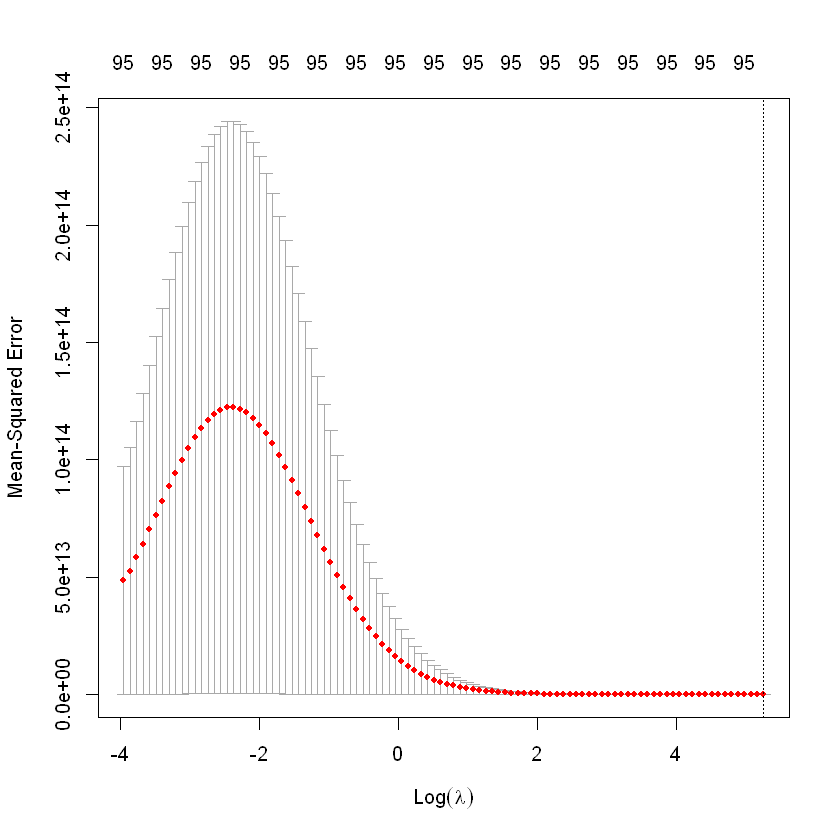

In [54]:
# Find the best lambda using CV
lr <- cv.glmnet(as.matrix(train[,1-96]), train$Bankrupt., alpha=0)
plot(lr)
best_lr2 <- lr$lambda.min
print(paste('Best lambda =', best_lr2))

In [56]:
# Refit the model using best lambda selected
lr3 <- glmnet(as.matrix(train[, 1-96]), train$Bankrupt., alpha=0)
pred <- predict(lr3, s=191.561029251535, newx=as.matrix(test[, 1-96]))
mse <- mean((pred - test$Bankrupt.)^2)
mse

[1] 0.02989781

In [ ]:
# Lasso regression model 

[1] "Best lambda = 0.00558410565037631"


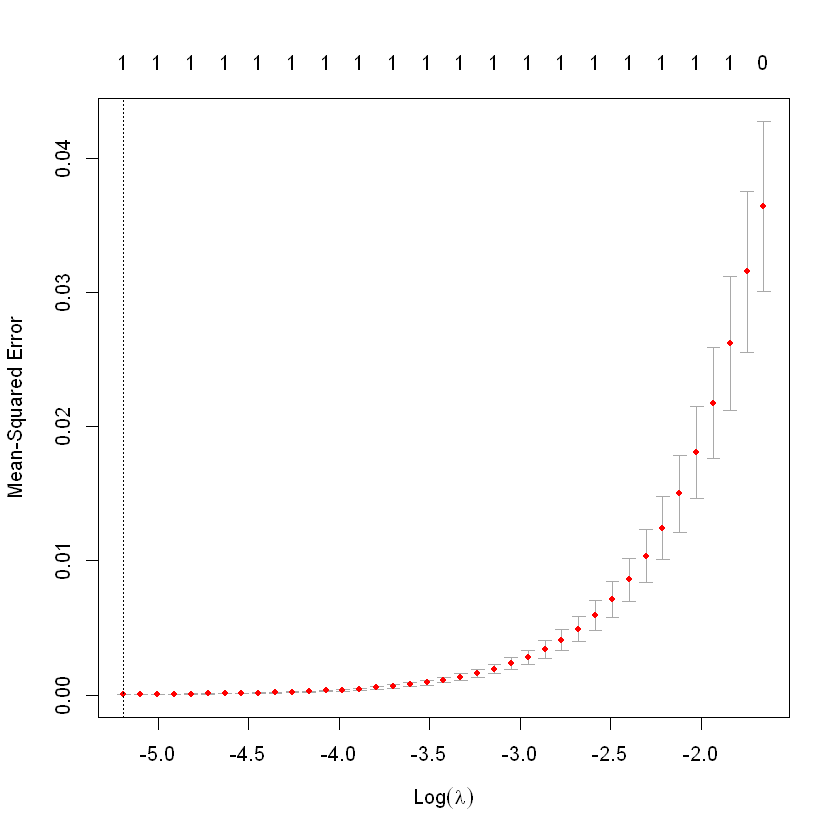

In [57]:
# Find the best lambda using CV
lr <- cv.glmnet(as.matrix(train[, 1-96]), train$Bankrupt., alpha=1)
plot(lr)
best_lambda <- lr$lambda.min
print(paste('Best lambda =', best_lambda))

In [58]:
# Refit the model using best lambda selected from CV
lr <- glmnet(as.matrix(train[, 1-96]), train$Bankrupt., alpha=1)
pred <- predict(lr, s=0.00558410565037631, newx=as.matrix(test[, 1-96]))
mse <- mean((pred - test$Bankrupt.)^2)
mse

[1] 2.540577e-05

In [ ]:
# Random forest

In [62]:
rf <- randomForest(Bankrupt. ~ ., data=train, proximity=TRUE) 
print(rf)

Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"



Call:
 randomForest(formula = Bankrupt. ~ ., data = train, proximity = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 31

          Mean of squared residuals: 0.02751811
                    % Var explained: 25.01


In [ ]:
p1 <- predict(rf, train)
confusionMatrix(p1, train$Bankrupt.)

In [ ]:
p2 <- predict(rf, test)
confusionMatrix(p2, test$Bankrupt.)

In [ ]:
# Support vector 

In [ ]:
classifier = svm(formula = Bankrupt. ~ .,
                 data = train,
                 type = 'C-classification',
                 kernel = 'linear')

Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
"Variable(s) 'Net.Income.Flag' constant. Cannot scale data."
